-1.3605284210526318 0.3615422230968507
[0.60891646 1.48548085 1.50944482]


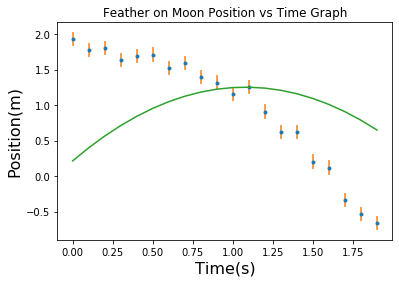

In [38]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

data = np.loadtxt('./feather.txt', skiprows=1, delimiter=',')
time_col = data[:,0]
position_col = data[:,1]
uncertainty_col = data[:,2]
plt.plot(time_col, position_col, linestyle="",marker=".")
plt.title('Feather on Moon Position vs Time Graph')
plt.xlabel('Time(s)', fontsize=16)
plt.ylabel('Position(m)', fontsize=16)
plt.errorbar(time_col, position_col, yerr=data[:,2], ls="none")
dt = (time_col[1:]-time_col[:-1])
ds = (position_col[1:]-position_col[:-1])
u=ds/dt
average_speed = np.mean(u)
standard_error = np.std(u, ddof=1)/np.sqrt(len(position_col))
errors = np.ones(len(position_col))
print(average_speed, standard_error)
def speed_calc():
    summation_array= (time_col[:]-np.mean(time_col))*(position_col[:]-np.mean(position_col))
    time_squared = (time_col[:]-np.mean(time_col))**2
    numerator_sum = np.sum(summation_array)
    denominator_sum = np.sum(time_squared)
    return numerator_sum/denominator_sum

def init_distance():
    return np.mean(position_col)-(speed_calc()*np.mean(time_col))

def predict_distance(time, initial_position,initial_speed, acceleration):
    return initial_position + (initial_speed*time) + 0.5*acceleration*time**2

popt, pcov = curve_fit(predict_distance, time_col, position_col, sigma=errors, absolute_sigma=True, p0=[2.0,-2.0,-1.42])
pstd = np.sqrt(np.diag(pcov))

print('Curve Fit Position: ', popt[0], "m +/- " pstd[0,0], 'm')

plt.plot(time_col, predict_distance(time_col,popt[1],1.926565, -popt[0]))


model_data = predict_distance(time_col, position_col, 1.926565, -1.42)

print(pstd)


    